<a href="https://colab.research.google.com/github/Neeraton/Cotton-Plant-Disease-Prediction-/blob/main/plat_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

print(tf.__version__)


2.17.0


In [ ]:
train_data_path = "/content/drive/MyDrive/Mini_pp/train"
validation_data_path = "/content/drive/MyDrive/Mini_pp/val"

In [ ]:
# show augmented images
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [ ]:
# this is the augmentation configuration we will use for training
# It generate more images using below parameters
training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')

# this is a generator that will read pictures found in
# at train_data_path, and indefinitely generate
# batches of augmented image data
training_data = training_datagen.flow_from_directory(train_data_path, # this is the target directory
                                      target_size=(150, 150), # all images will be resized to 150x150
                                      batch_size=32,
                                      class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

Found 1951 images belonging to 4 classes.


In [ ]:
training_data.class_indices

{'diseased cotton leaf': 0,
 'diseased cotton plant': 1,
 'fresh cotton leaf': 2,
 'fresh cotton plant': 3}

In [ ]:
# this is the augmentation configuration we will use for validation:
# only rescaling
valid_datagen = ImageDataGenerator(rescale=1./255)

# this is a similar generator, for validation data
valid_data = valid_datagen.flow_from_directory(validation_data_path,
                                  target_size=(150,150),
                                  batch_size=32,
                                  class_mode='binary')

Found 324 images belonging to 4 classes.


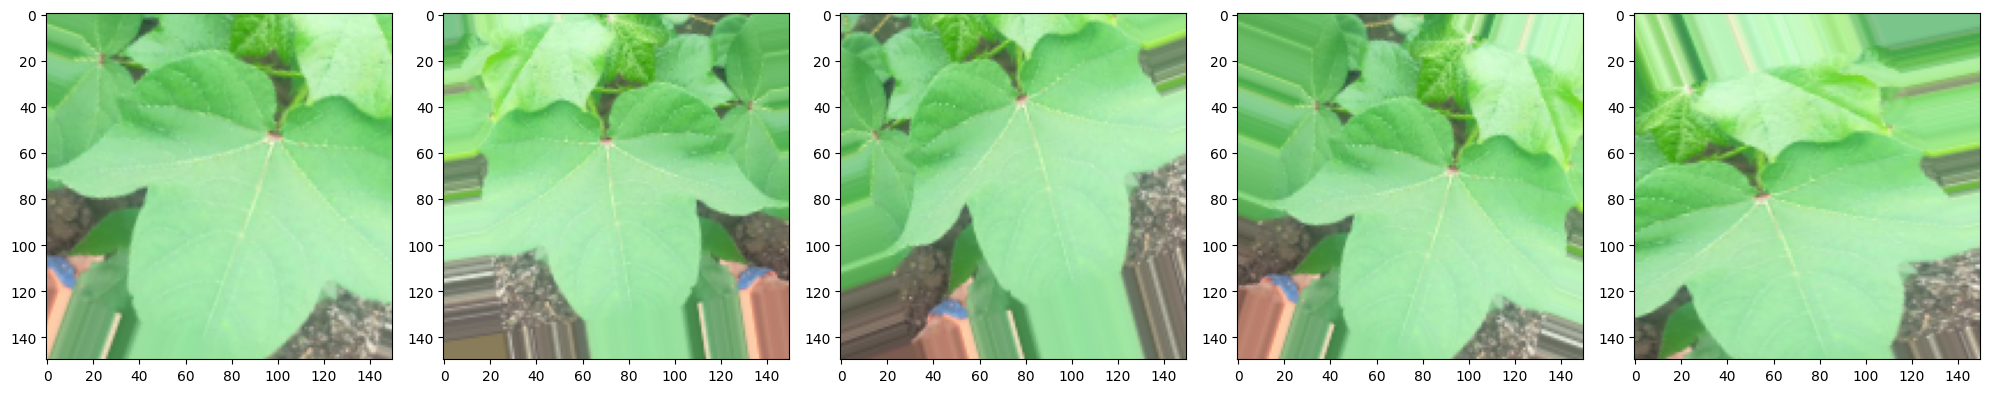

In [ ]:
# showing augmented images
images = [training_data[0][0][0] for i in range(5)]
plotImages(images)

In [ ]:
# save best model using vall accuracy
model_path = '/content/drive/MyDrive/Mini_pp/s.keras'
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [ ]:
from tensorflow import keras

In [ ]:
cnn_model = keras.models.Sequential([
                                    keras.layers.Conv2D(filters=32, kernel_size=3, input_shape=[150, 150, 3]),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=64, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=128, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=256, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),

                                    keras.layers.Dropout(0.5),
                                    keras.layers.Flatten(), # neural network beulding
                                    keras.layers.Dense(units=128, activation='relu'), # input layers
                                    keras.layers.Dropout(0.1),
                                    keras.layers.Dense(units=256, activation='relu'),
                                    keras.layers.Dropout(0.25),
                                    keras.layers.Dense(units=4, activation='softmax') # output layer
])


# compile cnn model
cnn_model.compile(optimizer = Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,028,228 (7.74 MB)

 Trainable params: 2,028,228 (7.74 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = cnn_model.fit(training_data,
                          epochs=100,
                          verbose=1,
                          validation_data= valid_data,
                          callbacks=callbacks_list)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


60/61 ━━━━━━━━━━━━━━━━━━━━ 4s 5s/step - accuracy: 0.4177 - loss: 1.3095 
Epoch 1: val_accuracy improved from -inf to 0.49074, saving model to /content/drive/MyDrive/Mini_pp/s.keras
61/61 ━━━━━━━━━━━━━━━━━━━━ 504s 8s/step - accuracy: 0.4184 - loss: 1.3076 - val_accuracy: 0.4907 - val_loss: 1.1047
Epoch 2/100
60/61 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step - accuracy: 0.5341 - loss: 1.0800
Epoch 2: val_accuracy improved from 0.49074 to 0.50000, saving model to /content/drive/MyDrive/Mini_pp/s.keras
61/61 ━━━━━━━━━━━━━━━━━━━━ 24s 341ms/step - accuracy: 0.5350 - loss: 1.0786 - val_accuracy: 0.5000 - val_loss: 1.1268
Epoch 3/100
60/61 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step - accuracy: 0.6315 - loss: 0.9498
Epoch 3: val_accuracy did not improve from 0.50000
61/61 ━━━━━━━━━━━━━━━━━━━━ 23s 346ms/step - accuracy: 0.6316 - loss: 0.9488 - val_accuracy: 0.4722 - val_loss: 1.1972
Epoch 4/100
60/61 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step - accuracy: 0.6284 - loss: 0.9500
Epoch 4: val_accuracy improved from 0.50000 

In [ ]:
model_path2 = '/content/drive/MyDrive/Mini_pp/s.keras'
cnn_model.save(model_path2)

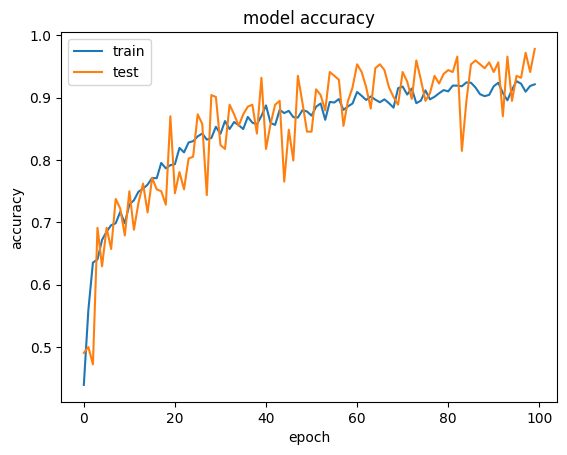

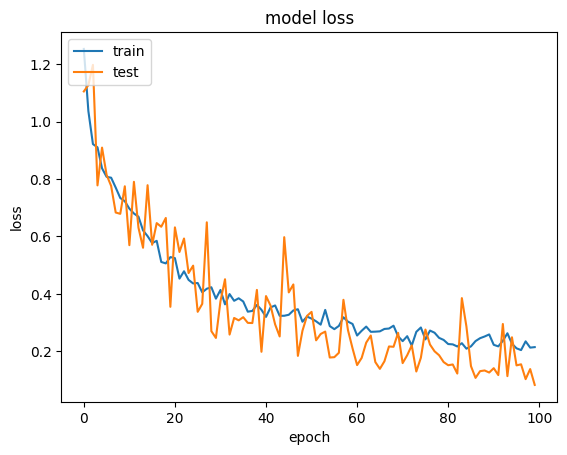

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


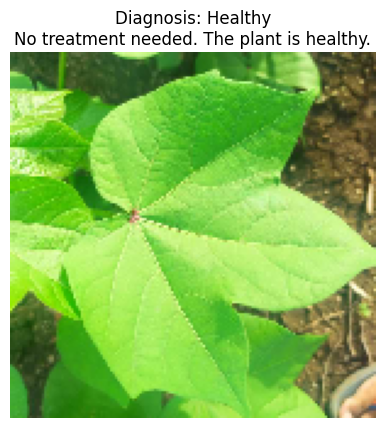

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('/content/drive/MyDrive/Mini_pp/s1.keras')

# Load example images for testing (Update the paths to your images)
test_images = [
    '/content/drive/MyDrive/Mini_pp/CPP.jpg']

# Preprocess the images as per the model's input requirements
def preprocess_image(image_path, target_size=(150, 150)):
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize to [0, 1]
    return img_array, img

# Prepare lists to store preprocessed images and original images for plotting
preprocessed_images = []
original_images = []

# Preprocess and load the test images
for img_path in test_images:
    preprocessed_img, original_img = preprocess_image(img_path)
    preprocessed_images.append(preprocessed_img)
    original_images.append(original_img)

# Stack the preprocessed images into a single batch for model prediction
test_data = np.vstack(preprocessed_images)

# Predict using the loaded model
predictions = model.predict(test_data)

# Class labels
class_labels = ['Bacterial Blight', 'Verticillium Wilt','Healthy']

# Function to suggest medication based on predicted class
def get_treatment_suggestion(predicted_class):
    if predicted_class == 0:  # Bacterial Blight
        return "Treatment: Use copper-based fungicides or bactericides."
    elif predicted_class == 1:  # Verticillium Wilt
        return "Treatment: Use resistant cotton varieties, rotate crops."
    elif predicted_class == 2:  # Healthy
        return "No treatment needed. The plant is healthy."

# Plot images with their predictions and treatment suggestions
plt.figure(figsize=(12, 12))

for i, prediction in enumerate(predictions):
    predicted_class = np.argmax(prediction)
    diagnosis = f"{class_labels[predicted_class]}"
    treatment = get_treatment_suggestion(predicted_class)

    # Display each image with the corresponding diagnosis and treatment
    plt.subplot(3, 1, i + 1)
    plt.imshow(original_images[i])
    plt.title(f"Diagnosis: {diagnosis}\n{treatment}")
    plt.axis('off')

# Show the plot with all images and diagnoses
plt.tight_layout()
plt.show()